# Complete Regression - Lab

## Introduction
By now, you have created all the necessary functions to calculate the slope, intercept, best-fit line, prediction, and visualizations. In this lab you will put them all together to run a regression experiment and calculate the model loss. 

## Objectives

You will be able to:

* Perform a linear regression using self-constructed functions
* Calculate the coefficient of determination using self-constructed functions
* Use the coefficient of determination to determine model performance

## The formulas

**Slope**: 
$\hat m = \dfrac{\overline{x}*\overline{y}-\overline{xy}}{(\overline{x})^2-\overline{x^2}}$


**Intercept**: $ \hat c = \bar{y} - \hat m\bar{x}$

**Prediction**: $\hat{y} = \hat mx + \hat c$

**R-Squared**: 
$ R^2 = 1- \dfrac{SS_{RES}}{SS_{TOT}} = 1 - \dfrac{\sum_i(y_i - \hat y_i)^2}{\sum_i(y_i - \overline y_i)^2} $


Use the Python functions created earlier to implement these formulas to run a regression analysis using x and y as input variables. 

In [16]:
import numpy as np
import matplotlib.pyplot as plt

def slope(x,y):
    x_mean, y_mean, xy_mean = np.mean(x), np.mean(y), np.mean(x*y)
    num = x_mean * y_mean - xy_mean
    denom = x_mean**2 - np.mean(x**2)
    return num/denom

def intercept(x,y):
    m = slope(x,y)
    c = np.mean(y) - m*np.mean(x)
    return c
    
def prediction(x,y):
    m = slope(x,y)
    c = intercept(x,y)
    return m*x + c

def reg_line(m,c,X):
    return [(m*x) + c for x in X]

def r_squared(y_real, y_predicted):
    RES = sq_err(y_real,y_predicted)
    y_mean = y_real.mean()
    TOT =  round(np.sum((y_real - y_mean)**2),2)
    cod = 1 - (RES/TOT)
    return cod

def sq_err(y_real, y_predicted):
    return round(np.sum((y_predicted - y_real)**2),2)

In [3]:
# Combine all the functions created so far to run a complete regression experiment. 
# Produce an output similar to the one shown below. 

X = np.array([1, 2, 3, 4, 5, 6, 7, 8, 9, 10], dtype=np.float64)
Y = np.array([7, 7, 8, 9, 9, 10, 10, 11, 11, 12], dtype=np.float64)

predicted_y = prediction(X,Y)

In [4]:
predicted_y

array([ 6.89090909,  7.44848485,  8.00606061,  8.56363636,  9.12121212,
        9.67878788, 10.23636364, 10.79393939, 11.35151515, 11.90909091])

Slope:  0.56
Y-Intercept:  6.33
R-squared:  0.97


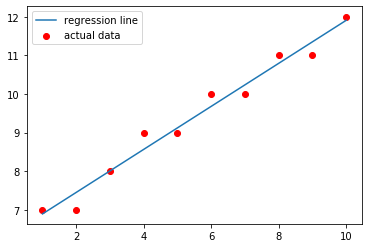

In [17]:
print('Slope: ', round(slope(X,Y),2))
print('Y-Intercept: ', round(intercept(X,Y),2))
print('R-squared: ', round(r_squared(Y,predicted_y),2))
m = slope(X,Y)
c= intercept(X,Y)
plt.scatter(X,Y, color='red', label='actual data')
plt.plot(X, reg_line(m,c,X), label = 'regression line')
plt.legend()
plt.show()

In [ ]:
# Basic Regression Diagnostics
# ----------------------------
# Slope: 0.56
# Y-Intercept: 6.33
# R-Squared: 0.97
# ----------------------------
# Model: Y = 0.56 * X + 6.33

## Make Predictions

Predict and plot the value of y using regression line above for a new value of $x = 4.5$.

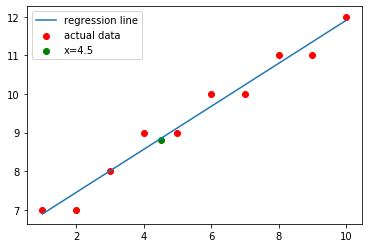

In [18]:
# Make prediction for x = 4.5 and visualize on the scatter plot
X_45 = slope(X,Y) * 4.5 + intercept(X,Y)

m = slope(X,Y)
c= intercept(X,Y)
plt.scatter(X,Y, color='red', label='actual data')
plt.scatter(4.5,8.8, color='green', label='x=4.5') # this is the x=4.5 provided by the question
plt.plot(X, reg_line(m,c,X), label = 'regression line')
plt.legend()
plt.show()

## Level up - Optional 
Load the "`heightweight.csv`" dataset. Use the height as an independent and weight as a dependent variable and draw a regression line to data using your code above. Calculate your R-Squared value for the model and try to predict new values of y. 

## Summary

In this lab, we ran a complete simple regression analysis experiment using functions created so far. Next up, you'll learn how you can use Python's built-in modules to perform similar analyses with a much higher level of sophistication. 

In [19]:
import pandas as pd
df = pd.read_csv('heightweight.csv')

In [20]:
df.head()

,height,weight
0,68,165
1,71,201
2,61,140
3,69,170
4,71,192


In [21]:
x_var = df.height # x_variable height is the independent variable
y_var = df.weight # y_variable weight is the dependent variable

Slope:  5.54
Y-Intercept:  -204.48
R-squared:  0.96


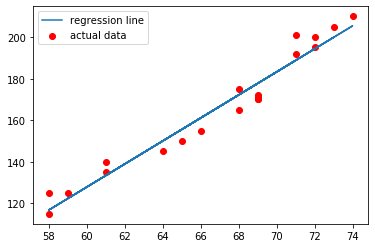

In [22]:
predicted_y_var = prediction(x_var,y_var)
print('Slope: ', round(slope(x_var,y_var),2))
print('Y-Intercept: ', round(intercept(x_var,y_var),2))
print('R-squared: ', round(r_squared(y_var,predicted_y_var),2))
m = slope(x_var,y_var)
c= intercept(x_var,y_var)
plt.scatter(x_var,y_var, color='red', label='actual data')
plt.plot(x_var, reg_line(m,c,x_var), label = 'regression line')
plt.legend()
plt.show()